### Підготовка датасету

Мій датасет - результат аналізу найкращих пісень за 2010-2019 роки на платформі Spotify.Кількість стовпців - 14.

Стовпці датасету представляють такі характеристики пісні:

title — назва;

artist — ім'я виконавця;

top genre - назва жанру;

year - рік випуску;

bpm - (beats per minute) темп;

nrgy - коефіцієнт енергійності (чим вище значення, тим пісня енергічніша);

dnce - коефіцієнт можливості танцювання (чим вище значення, тим легше під неї танцювати);

dB - гучність (чим вище значення, тим пісня гучніша);

live - коефіцієнт живого запису (чим вище значення, тим більша імовірність, що трек записувався із живими інструментами);

val - мотив (чим вище значення, тим веселіший мотив);

dur - тривалість (в секундах);

acous - акустичність (чим вище значення, тим менше відлуння);

spch - коефіцієнт розмовності (чим вище значення, тим більше слів різноманітних слів було використано);

pop - коефіцієнт популярності (чим вище значення, тим більша популярність).

P.S. Значення визначене як коефіцієнт має можливий діапазон значень від 0 до 100.

In [38]:
# Датасет взято із https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/AlexRedchuk/csvSharing/master/top10s.csv"

df = pd.read_csv(url, encoding='cp1252')
df.drop('Unnamed: 0', inplace=True, axis=1)

df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [39]:
sub_df = df[df.groupby('top genre')['top genre'].transform('count')>9].copy() 
sub_df['top genre'].value_counts()

dance pop        327
pop               60
canadian pop      34
boy band          15
barbadian pop     15
electropop        13
british soul      11
big room          10
Name: top genre, dtype: int64

### Нормалізація

In [40]:
import pandas as pd
from sklearn import preprocessing

df_normalized = sub_df.copy()
non_categorial_fields = ['bpm', 'nrgy',	'dnce',	'dB',	'live',	'val',	'dur',	'acous',	'spch',	'pop']
x = sub_df[non_categorial_fields].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized[non_categorial_fields] = x_scaled
df_normalized

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
2,TiK ToK,Kesha,dance pop,2010,0.582524,0.857143,0.783505,0.982759,0.391892,0.724490,0.227586,0.108696,0.291667,0.808081
3,Bad Romance,Lady Gaga,dance pop,2010,0.577670,0.938776,0.721649,0.965517,0.108108,0.724490,0.555172,0.000000,0.083333,0.797980
4,Just the Way You Are,Bruno Mars,pop,2010,0.529126,0.857143,0.659794,0.948276,0.121622,0.438776,0.300000,0.021739,0.083333,0.787879
5,Baby,Justin Bieber,canadian pop,2010,0.315534,0.877551,0.752577,0.948276,0.148649,0.551020,0.275862,0.043478,0.291667,0.777778
6,Dynamite,Taio Cruz,dance pop,2010,0.582524,0.795918,0.773196,0.965517,0.054054,0.836735,0.237931,0.000000,0.187500,0.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,0.504854,0.673469,0.628866,0.913793,0.270270,0.163265,0.144828,0.010870,0.062500,0.757576
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,0.461165,0.806122,0.773196,0.931034,0.094595,0.622449,0.248276,0.228261,0.250000,0.757576
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,0.660194,0.775510,0.546392,0.948276,0.121622,0.663265,0.434483,0.076087,0.708333,0.707071
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,0.553398,0.806122,0.618557,0.931034,0.567568,0.244898,0.286207,0.010870,0.145833,0.696970


P.S. Робота із пропущеними значеннями не потрібна, адже в мене пропущені такі дані

### Розподіл на навчальні та тестові дані

In [41]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

X = df_normalized[non_categorial_fields] # Features
y = df_normalized['top genre'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Розподіл з критерієм gini

In [42]:
# Create Decision Tree classifer object
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
max_depth=10, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = clf_gini.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5590062111801242


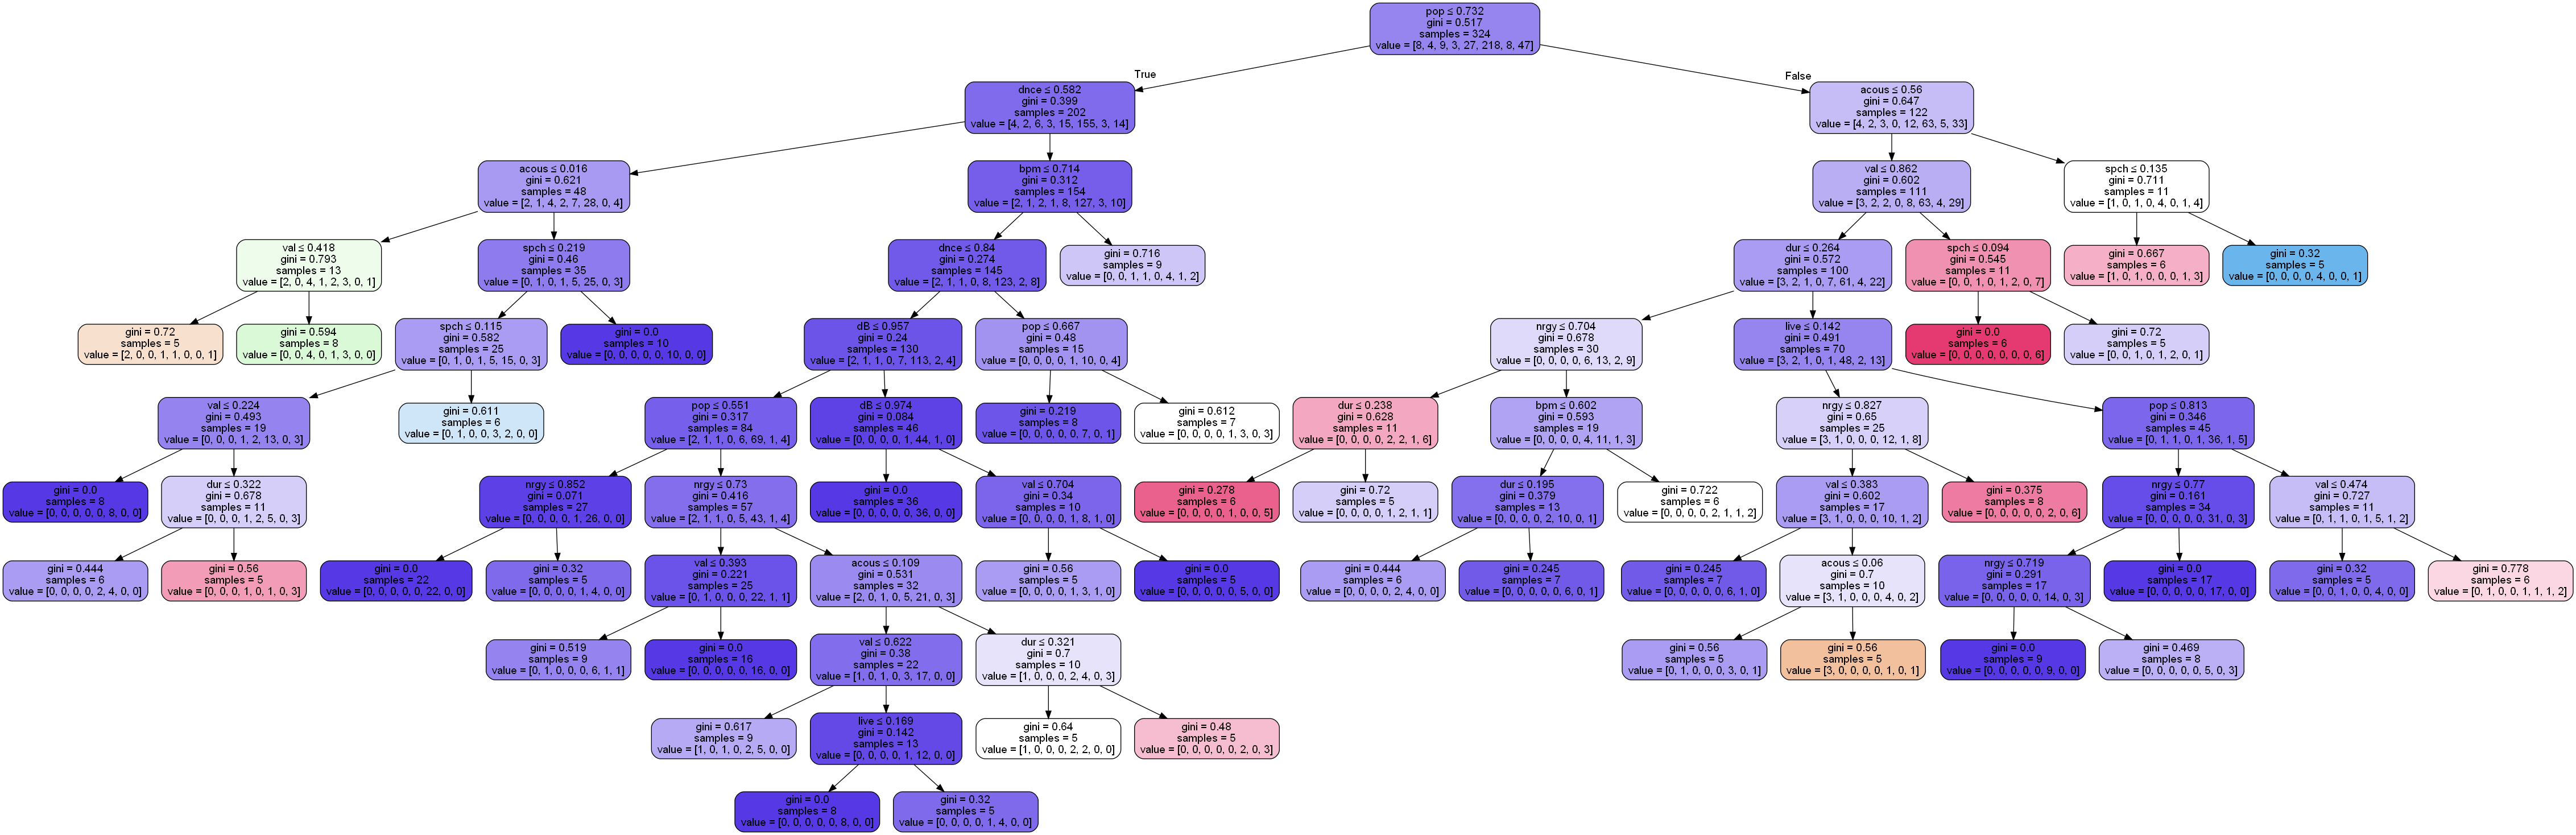

In [43]:
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = non_categorial_fields)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('songs_tree_gini.png')
Image(graph.create_png())

### Розподіл з критерієм entropy

In [44]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
max_depth=10, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

y_pred = clf_entropy.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5900621118012422


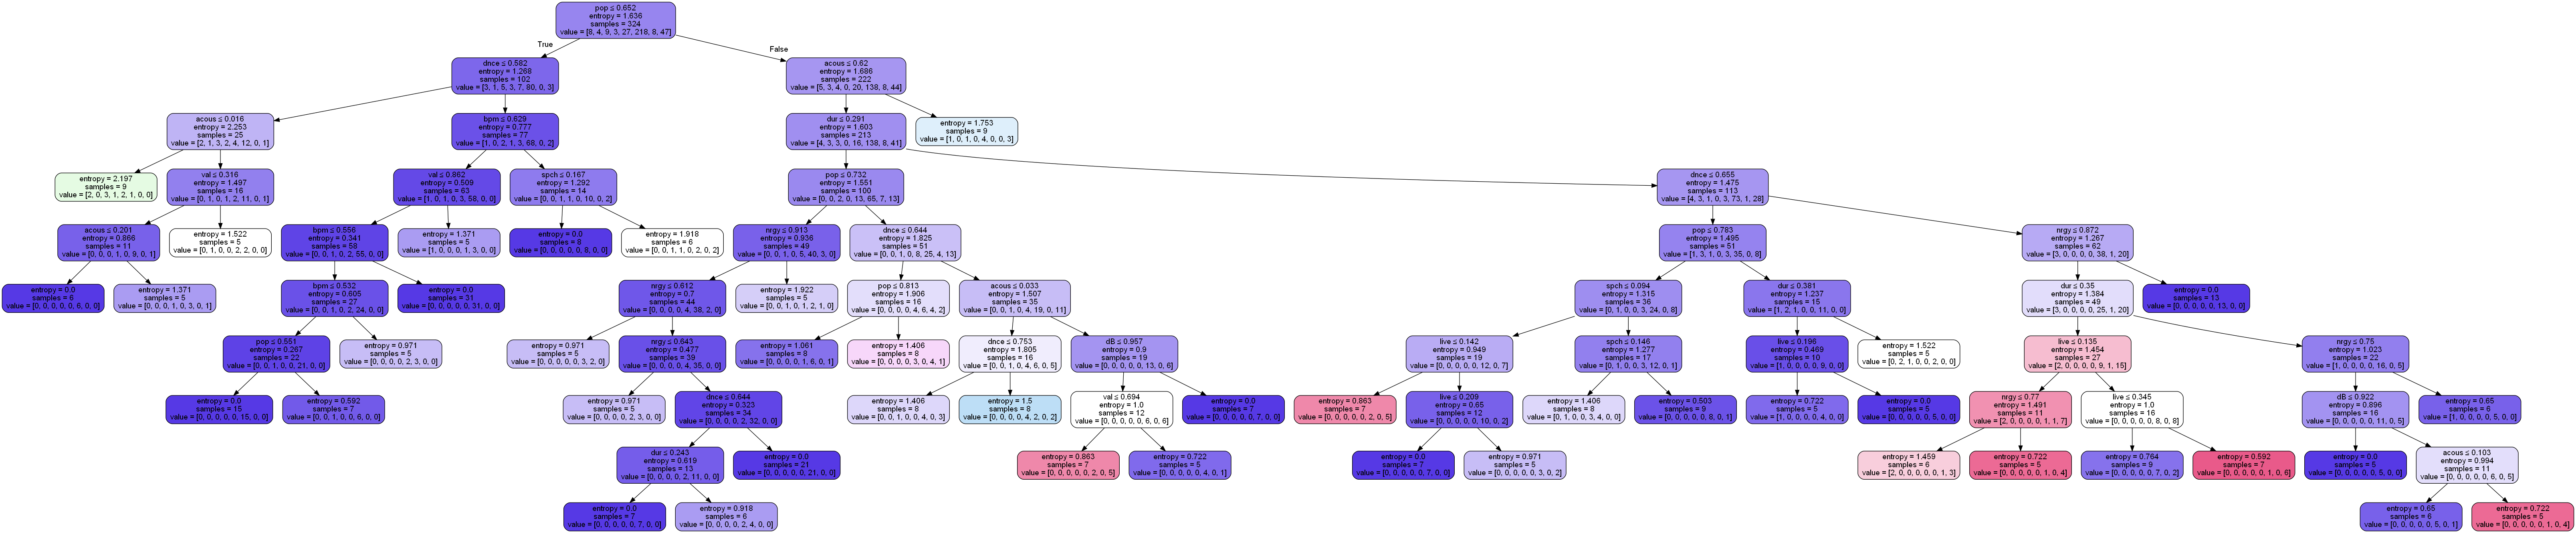

In [45]:
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = non_categorial_fields)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('songs_tree_entropy.png')
Image(graph.create_png())

### Пошук оптимальних параметрів

In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

min_samples_leaf = range(1, 20, 1)
label_encoded_Y = LabelEncoder().fit_transform(y_train)
dt = DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_split='int', random_state = 100, 
                            min_samples_leaf=min_samples_leaf)

max_features=['auto', 'sqrt', 'log2']
min_samples_split = range(2, 20, 2)
max_depth = range(2, 25, 1)
param_grid = dict(max_depth=max_depth, min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split, 
max_features=max_features)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
grid_search = GridSearchCV(dt, param_grid, scoring="balanced_accuracy", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, label_encoded_Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 5 folds for each of 11799 candidates, totalling 58995 fits


c:\users\sanya\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Best: 0.224704 using {'max_depth': 13, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 8}
0.146804 (0.031401) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
0.146804 (0.031401) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4}
0.146804 (0.031401) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6}
0.146804 (0.031401) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 8}
0.146804 (0.031401) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}
0.146804 (0.031401) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 12}
0.138233 (0.015310) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 14}
0.141407 (0.016183) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1,

0.150959 (0.017268) with: {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 6}
0.150959 (0.017268) with: {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 8}
0.150959 (0.017268) with: {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 10}
0.150959 (0.017268) with: {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 12}
0.150959 (0.017268) with: {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 14}
0.150959 (0.017268) with: {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 16}
0.150959 (0.017268) with: {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 18}
0.145245 (0.013959) with: {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 2}
0.145245 (0.013959) with: {'max_depth': 4, 'max_features': 'log2', 'min_samples_le

0.148390 (0.016668) with: {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 19, 'min_samples_split': 12}
0.148390 (0.016668) with: {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 19, 'min_samples_split': 14}
0.148390 (0.016668) with: {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 19, 'min_samples_split': 16}
0.148390 (0.016668) with: {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 19, 'min_samples_split': 18}
0.154383 (0.030170) with: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
0.156533 (0.027526) with: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4}
0.166097 (0.042930) with: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6}
0.151335 (0.031264) with: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8}
0.178706 (0.028835) with: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_

0.136174 (0.017953) with: {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 14}
0.131399 (0.026082) with: {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 16}
0.130502 (0.019105) with: {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 18}
0.179742 (0.059157) with: {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2}
0.179742 (0.059157) with: {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 4}
0.179742 (0.059157) with: {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 6}
0.179742 (0.059157) with: {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 8}
0.179742 (0.059157) with: {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 10}
0.140953 (0.050763) with: {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf

0.145979 (0.018190) with: {'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 12, 'min_samples_split': 4}
0.145979 (0.018190) with: {'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 12, 'min_samples_split': 6}
0.145979 (0.018190) with: {'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 12, 'min_samples_split': 8}
0.145979 (0.018190) with: {'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 12, 'min_samples_split': 10}
0.145979 (0.018190) with: {'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 12, 'min_samples_split': 12}
0.145979 (0.018190) with: {'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 12, 'min_samples_split': 14}
0.145979 (0.018190) with: {'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 12, 'min_samples_split': 16}
0.145979 (0.018190) with: {'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 12, 'min_samples_split': 18}
0.154506 (0.023096) with: {'max_depth': 12, 'max_features': 'auto',

0.145979 (0.018190) with: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'min_samples_split': 6}
0.145979 (0.018190) with: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'min_samples_split': 8}
0.145979 (0.018190) with: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'min_samples_split': 10}
0.145979 (0.018190) with: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'min_samples_split': 12}
0.145979 (0.018190) with: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'min_samples_split': 14}
0.145979 (0.018190) with: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'min_samples_split': 16}
0.145979 (0.018190) with: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'min_samples_split': 18}
0.154506 (0.023096) with: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 13, 'min_samples_split': 2}
0.154506 (0.023096) with: {'max_depth': 15, 'max_features': 'sqrt',

0.138475 (0.033822) with: {'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 18}
0.136507 (0.026576) with: {'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 2}
0.136507 (0.026576) with: {'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 4}
0.136507 (0.026576) with: {'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 6}
0.136507 (0.026576) with: {'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 8}
0.136507 (0.026576) with: {'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 10}
0.136507 (0.026576) with: {'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 12}
0.136507 (0.026576) with: {'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 14}
0.134989 (0.032376) with: {'max_depth': 18, 'max_features': 'log2', 'min_sam

0.178378 (0.053299) with: {'max_depth': 21, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 4}
0.178378 (0.053299) with: {'max_depth': 21, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 6}
0.206003 (0.092530) with: {'max_depth': 21, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 8}
0.166271 (0.053623) with: {'max_depth': 21, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 10}
0.135972 (0.040313) with: {'max_depth': 21, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 12}
0.174015 (0.059030) with: {'max_depth': 21, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 14}
0.158322 (0.044425) with: {'max_depth': 21, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 16}
0.134175 (0.020887) with: {'max_depth': 21, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 18}
0.172297 (0.075910) with: {'max_depth': 21, 'max_features': 'log2', 'min_sa

0.137644 (0.026735) with: {'max_depth': 24, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 4}
0.137644 (0.026735) with: {'max_depth': 24, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 6}
0.137644 (0.026735) with: {'max_depth': 24, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 8}
0.137644 (0.026735) with: {'max_depth': 24, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 10}
0.137644 (0.026735) with: {'max_depth': 24, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 12}
0.144690 (0.043523) with: {'max_depth': 24, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 14}
0.139553 (0.038010) with: {'max_depth': 24, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 16}
0.138475 (0.033822) with: {'max_depth': 24, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 18}
0.136507 (0.026576) with: {'max_depth': 24, 'max_features': 'log2', 'min_sa

### Застосування оптимальних параметрів для gini

In [49]:
# Create Decision Tree classifer object
clf_optimal = DecisionTreeClassifier(criterion="gini", random_state = 100,
max_depth=13, min_samples_leaf=3, min_samples_split=8)

# Train Decision Tree Classifer
clf = clf_optimal.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.515527950310559


### Застосування оптимальних параметрів для entropy

In [50]:
# Create Decision Tree classifer object
clf_optimal = DecisionTreeClassifier(criterion="entropy", random_state = 100,
max_depth=13, min_samples_leaf=3, min_samples_split=8)

# Train Decision Tree Classifer
clf = clf_optimal.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.515527950310559


### Висновки

Оптимальні параметри мають менші значення глибини дерева та мінімальної кількості листків.


Для параметру gini - точність збільшилась на 17%.


Для параметру entropy - точність збільшилась на 52%.